# 🔁 Cross-Validation: 

Cross-validation is a **model evaluation technique** used to estimate how well a machine learning model will perform on **unseen data**. It is especially valuable when the dataset is **small**, where a single train–test split may give misleading results.

---

## 1. Why Do We Need Cross-Validation?

When we train a model and evaluate it on the same data, the performance appears unrealistically good.  
To measure **generalization ability**, we must test the model on data it has **never seen before**.

A simple train–test split helps, but:
- The result depends heavily on **how the split is done**
- Performance may vary significantly with different splits

Cross-validation addresses this problem.

---

## 2. What Is K-Fold Cross-Validation?

**K-Fold Cross-Validation** divides the dataset into **K equal-sized subsets**, called *folds*.

### Procedure
1. Split the data into **K folds**
2. Use **K−1 folds** for training
3. Use the **remaining fold** for testing
4. Repeat the process **K times**
5. Compute the **average performance** across all folds

Each data point is:
- Used for training **K−1 times**
- Used for testing **exactly once**

---

## 3. Conceptual Illustration

For **K = 5**:

| Iteration | Training Folds | Testing Fold |
|---------|---------------|--------------|
| 1 | F2, F3, F4, F5 | F1 |
| 2 | F1, F3, F4, F5 | F2 |
| 3 | F1, F2, F4, F5 | F3 |
| 4 | F1, F2, F3, F5 | F4 |
| 5 | F1, F2, F3, F4 | F5 |

---

## 4. Why Does K-Fold Cross-Validation Reduce Variance?

A single train–test split:
- Depends on random sampling
- May overestimate or underestimate model performance

K-Fold Cross-Validation:
- Evaluates the model on **multiple test sets**
- Averages results across folds
- Produces a **more stable and reliable estimate**

This significantly **reduces variance** in performance evaluation.

---

## 5. Bias–Variance Trade-Off in K-Fold CV

The choice of **K** affects bias and variance:

| K Value | Bias | Variance | Computation |
|-------|------|----------|-------------|
| Small K (e.g., 3) | Higher | Lower | Faster |
| Large K (e.g., 10) | Lower | Higher | Slower |
| K = N (LOOCV) | Very Low | Very High | Very Slow |

---

## 6. Why Cross-Validation Is Useful for Small Datasets

In small datasets:
- Holding out a large test set wastes valuable data
- Models may not learn enough patterns

Cross-validation ensures:
- **Maximum data usage** for training
- Fair evaluation without sacrificing data efficiency

---

## 7. Cross-Validation vs Train–Test Split

| Aspect | Train–Test Split | K-Fold CV |
|-----|------------------|-----------|
| Data usage | Partial | Almost full |
| Stability | Low | High |
| Variance | High | Low |
| Computation | Fast | Slower |

---

## 8. When to Use K-Fold Cross-Validation

Use K-Fold CV when:
- Dataset is **small to medium**
- Reliable performance estimation is required
- Comparing multiple models or hyperparameters

Avoid it when:
- Dataset is extremely large
- Training is computationally expensive

---

## 9. Common Variants of Cross-Validation

### 🔹 Leave-One-Out Cross-Validation (LOOCV)
- K = number of samples
- Very low bias, very high variance
- Computationally expensive

### 🔹 Stratified K-Fold
- Preserves class proportions
- Preferred for **classification problems**

### 🔹 Time Series Cross-Validation
- Maintains temporal order
- Used in forecasting tasks

---

## 10. Practical Considerations

- Shuffle data before splitting (except time series)
- Choose **K = 5 or 10** as a standard
- Use the **same folds** when comparing models
- Never tune hyperparameters on test data

---

## 11. Key Takeaways

- Cross-validation evaluates **generalization performance**
- K-Fold CV reduces evaluation variance
- Essential for small datasets
- Provides fair and robust model comparison

---

Cross-validation bridges the gap between **training accuracy** and **real-world performance**, making it a cornerstone of reliable machine learning practice.

-----------
-----------


### 1. What we are doing 
- Split data into K folds
- Use K−1 folds for training, 1 fold for testing
- Repeat this K times
- Average the performance to get a stable evaluation

In [20]:
import numpy as np

# 1. Create a small dataset (y = 2x)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

# 2. Define the Model (Least Squares through the origin)
def train_model(X_train, y_train):
    """Calculates the optimal weight w for y = wx"""
    # Formula: w = sum(xy) / sum(x^2)
    w = np.sum(X_train * y_train) / np.sum(X_train**2)
    return w

def predict(X, w):
    return w * X

# 3. Define Evaluation Metric
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# 4. Robust K-Fold Cross-Validation
def k_fold_cross_validation(X, y, k=5):
    n_samples = len(X)
    indices = np.arange(n_samples)
    
    # Shuffle indices to ensure folds are random
    np.random.seed(42) # For reproducible results
    np.random.shuffle(indices)
    
    # Use np.array_split to handle cases where n_samples is not divisible by k
    # This creates a list of k arrays of indices
    folds = np.array_split(indices, k)
    
    mse_scores = []

    print(f"Starting {k}-Fold Cross-Validation...")
    print("-" * 35)

    for i in range(k):
        # The current fold is used for testing
        test_idx = folds[i]
        
        # All other folds are concatenated for training
        train_idx = np.concatenate([folds[j] for j in range(k) if j != i])

        # Split the data
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]

        # Train and predict
        w = train_model(X_train, y_train)
        y_pred = predict(X_test, w)

        # Evaluate
        fold_mse = mse(y_test, y_pred)
        mse_scores.append(fold_mse)

        print(f"Fold {i+1} | Trained w: {w:.2f} | MSE: {fold_mse:.4e}")

    return mse_scores

# 5. Run the process
k_val = 5
scores = k_fold_cross_validation(X, y, k=k_val)

print("-" * 35)
print(f"Average MSE across all folds: {np.mean(scores):.4e}")

Starting 5-Fold Cross-Validation...
-----------------------------------
Fold 1 | Trained w: 2.00 | MSE: 0.0000e+00
Fold 2 | Trained w: 2.00 | MSE: 0.0000e+00
Fold 3 | Trained w: 2.00 | MSE: 0.0000e+00
Fold 4 | Trained w: 2.00 | MSE: 0.0000e+00
Fold 5 | Trained w: 2.00 | MSE: 0.0000e+00
-----------------------------------
Average MSE across all folds: 0.0000e+00


### 🐍 Real-World K-Fold Cross-Validation from Scratch

Evaluating BMI vs Disease Progression (5-Folds)
---------------------------------------------
Fold 1|Intercept: 152.00| Slope: 998.58|MSE:4061.83
Fold 2|Intercept: 149.52| Slope: 922.15|MSE:4098.36
Fold 3|Intercept: 152.05| Slope: 979.95|MSE:3975.34
Fold 4|Intercept: 152.38| Slope: 902.51|MSE:3645.38
Fold 5|Intercept: 154.65| Slope: 943.33|MSE:3915.03
---------------------------------------------
Average MSE: 3939.19
Root MSE: 62.76 (Average error in disease units)


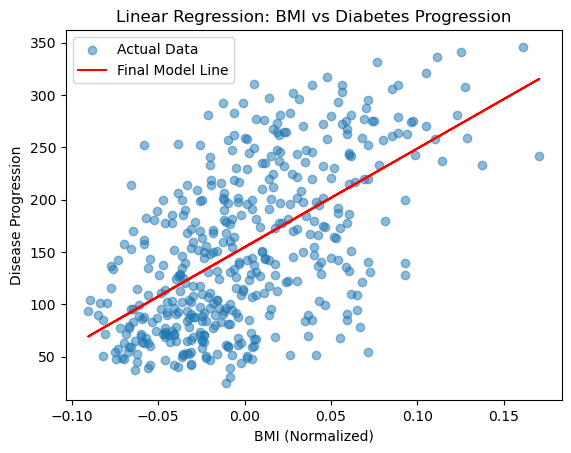

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

data = load_diabetes()
# We'll use BMI (index 2) as our feature to keep it easy to visualize
X,y = data.data[:,2], data.target.reshape(-1,1)

# Define the Model (Normal Equation: theta = (X^T X)^-1 X^T y)
def train_model(X_train,y_train):
    # Add a column of ones to X for the intercept(bias term)
    X_b = np.c_[np.ones((X_train.shape[0],1)),X_train]
    
    # Solve for weights: (X^T*X)^-1*X^T*y
    # np.linalg.pinv is used for the pseudo-inverse(more stable)
    weights = np.linalg.pinv(X_b.T@X_b) @ X_b.T @ y_train
    return weights
def predict(X,weights):
    # Add column of ones to test data
    X_b = np.c_[np.ones((X.shape[0],1)),X]
    return X_b @ weights
def mse(y_true,y_pred):
    return np.mean((y_true-y_pred)**2)

# K-Fold Cross-Validation
def k_fold_cv(X,y,k=5):
    n_samples = len(X)
    indices = np.arange(n_samples)
    np.random.seed(42)
    np.random.shuffle(indices)
    
    folds = np.array_split(indices,k)
    mse_scores = []
    
    print(f"Evaluating BMI vs Disease Progression ({k}-Folds)")
    print("-"*45)
    
    for i in range(k):
        test_idx = folds[i]
        train_idx = np.concatenate([folds[j] for j in range(k) if j!=i])
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx],y[test_idx]
        
        # Train and Predict
        weights = train_model(X_train,y_train)
        y_pred = predict(X_test,weights)
        
        # Score
        score = mse(y_test,y_pred)
        mse_scores.append(score)
        
        print(f"Fold {i+1}|Intercept: {weights[0][0]:.2f}| Slope: {weights[1][0]:.2f}|MSE:{score:.2f}")
        
    return mse_scores, weights # Returning last weights for visualization

# Run and Visualize
scores, final_weihts = k_fold_cv(X,y,k=5)
print("-"*45)
print(f"Average MSE: {np.mean(scores):.2f}")
print(f"Root MSE: {np.sqrt(np.mean(scores)):.2f} (Average error in disease units)")

# Plot the final fold's model
plt.scatter(X, y, alpha=0.5, label="Actual Data")
plt.plot(X, predict(X, final_weights), color='red', label="Final Model Line")
plt.xlabel("BMI (Normalized)")
plt.ylabel("Disease Progression")
plt.title("Linear Regression: BMI vs Diabetes Progression")
plt.legend()
plt.show()


### 🐍 Multi-Feature Linear Regression with K-Fold CV

Evaluating Multi-Feature Regression (5-Folds)
--------------------------------------------------
Fold 1 | MSE: 2900.19
Fold 2 | MSE: 2662.64
Fold 3 | MSE: 3312.31
Fold 4 | MSE: 2797.88
Fold 5 | MSE: 3403.89
--------------------------------------------------
Average MSE (All Features): 3015.38
Improvement: Compare this to the ~3900 MSE from the BMI-only model!


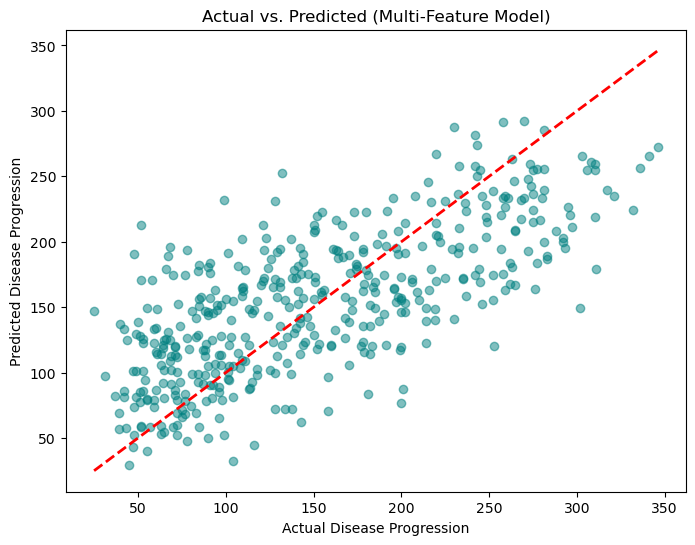

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# 1. Load the Full Dataset
data = load_diabetes()
X = data.data  # Using all 10 features now
y = data.target.reshape(-1, 1)
feature_names = data.feature_names

# 2. Model Functions (Handles any number of features)
def train_model(X_train, y_train):
    # Add intercept term
    X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    # Normal Equation: (X^T X)^-1 X^T y
    weights = np.linalg.pinv(X_b.T @ X_b) @ X_b.T @ y_train
    return weights

def predict(X, weights):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    return X_b @ weights

def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# 3. K-Fold Cross-Validation Logic
def k_fold_cv_full(X, y, k=5):
    n_samples = len(X)
    indices = np.arange(n_samples)
    np.random.seed(42)
    np.random.shuffle(indices)
    
    folds = np.array_split(indices, k)
    mse_scores = []
    
    print(f"Evaluating Multi-Feature Regression ({k}-Folds)")
    print("-" * 50)

    for i in range(k):
        test_idx = folds[i]
        train_idx = np.concatenate([folds[j] for j in range(k) if j != i])

        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]

        weights = train_model(X_train, y_train)
        y_pred = predict(X_test, weights)

        score = mse(y_test, y_pred)
        mse_scores.append(score)
        print(f"Fold {i+1} | MSE: {score:.2f}")

    return mse_scores, weights

# 4. Execution
scores, final_weights = k_fold_cv_full(X, y, k=5)

print("-" * 50)
print(f"Average MSE (All Features): {np.mean(scores):.2f}")
print(f"Improvement: Compare this to the ~3900 MSE from the BMI-only model!")

# 5. Visualizing Actual vs. Predicted
# Since we can't plot 10D, we plot how close our predictions are to reality
y_final_pred = predict(X, final_weights)

plt.figure(figsize=(8, 6))
plt.scatter(y, y_final_pred, alpha=0.5, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # 45-degree line
plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Disease Progression")
plt.title("Actual vs. Predicted (Multi-Feature Model)")
plt.show()

### Interpreting the Weights (Feature Importance)

In [54]:
# Optional: Print feature importance
print("Feature Importances:")
print(f"{'Intercept':<15}: {final_weights[0][0]:.2f}")
for name, weight in zip(feature_names, final_weights[1:]):
    print(f"{name:<15}: {weight[0]:.2f}")

Feature Importances:
Intercept      : 154.02
age            : 5.33
sex            : -235.78
bmi            : 500.49
bp             : 275.29
s1             : -1016.97
s2             : 637.34
s3             : 186.68
s4             : 210.33
s5             : 878.43
s6             : 82.30
